In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/pytorch-CycleGAN-and-pix2pix

/content/drive/MyDrive/pytorch-CycleGAN-and-pix2pix


In [4]:
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision import transforms
from models import pix2pix_model,networks
import argparse

In [26]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [5]:
opt = argparse.Namespace(
    input_nc=3,
    output_nc=3,
    ngf=64,
    netG='resnet_9blocks',
    norm='instance',
    no_dropout=False,
    init_type='normal',
    init_gain=0.02
)

In [10]:
netG = networks.define_G(opt.input_nc, opt.output_nc, opt.ngf, opt.netG, opt.norm, not opt.no_dropout, opt.init_type, opt.init_gain, [0])
netG = netG.module

initialize network with normal


In [35]:
order_dict = torch.load('/content/drive/MyDrive/pytorch-CycleGAN-and-pix2pix/checkpoints/metfaces_pix2pix_3/150_net_G.pth')

In [36]:
netG.load_state_dict(order_dict)

<All keys matched successfully>

In [19]:
img=Image.open('/content/drive/MyDrive/StyleGAN2/StyleGAN2-ada_Toonify/images/normal_face/sewoong.jpeg')

In [21]:
transform=transforms.Compose([transforms.Resize((320,320)),transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

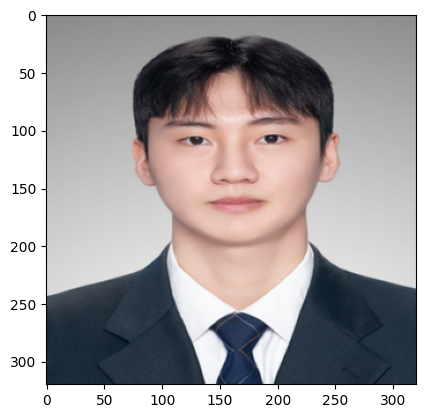

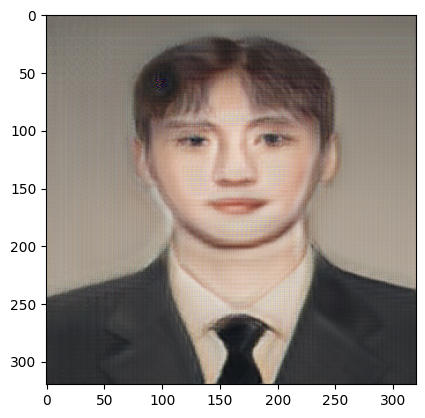

In [40]:
netG.eval()
t_img=transform(img).to(device)
t_img=t_img.view(1,3,320,320)
with torch.no_grad():
  out=netG(t_img)

out=out.to('cpu')
t_img=t_img.to('cpu')
out=out*0.5+0.5
t_img=t_img*0.5+0.5
plt.imshow(t_img[0].permute(1,2,0))
plt.show()
plt.imshow(out[0].permute(1,2,0))
plt.show()

In [ ]:
# model_G=model_G.to('cpu')
# m = torch.jit.script(model_G)
# torch.jit.save(m, '/content/drive/MyDrive/pytorch-CycleGAN-and-pix2pix/checkpoints/metfaces_pix2pix_3/epoch150_netG.pt')

In [ ]:
perspective_transformer = v2.RandomPerspective(distortion_scale=0.6, p=1.0)
perspective_imgs = [perspective_transformer(orig_img) for _ in range(4)]
plot([orig_img] + perspective_imgs)

rotater = v2.RandomRotation(degrees=(0, 180))
rotated_imgs = [rotater(orig_img) for _ in range(4)]
plot([orig_img] + rotated_imgs)

affine_transfomer = v2.RandomAffine(degrees=(30, 70), translate=(0.1, 0.3), scale=(0.5, 0.75))
affine_imgs = [affine_transfomer(orig_img) for _ in range(4)]
plot([orig_img] + affine_imgs)

jitter = v2.ColorJitter(brightness=.5, hue=.3)
jittered_imgs = [jitter(orig_img) for _ in range(4)]
plot([orig_img] + jittered_imgs)

gray_img = v2.Grayscale()(orig_img)
plot([orig_img, gray_img], cmap='gray')

blurrer = v2.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5.))
blurred_imgs = [blurrer(orig_img) for _ in range(4)]
plot([orig_img] + blurred_imgs)